In [63]:
import embedding_with_glove
import plot
from keras.models import Sequential, Model
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM, GRU, Input

In [2]:
MAX_LEN = 100
DIMENSION = 300
MAX_WORDS = 10000
TEST_SIZE = 0.1

In [68]:
def model():
    model = Sequential()
    model.add(Embedding(MAX_WORDS, DIMENSION, weights = [embedding_matrix], input_length = MAX_LEN, trainable = False))
    model.add(Flatten())
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.summary()
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
    history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_data = (X_test, Y_test))
    plot.plot(history)
    return model

In [48]:
labels, texts = embedding_with_glove.load_text('/home/chloe/Downloads/imdb/train') 
texts_tokenized, word_index = embedding_with_glove.tokenize(texts)
X_train, X_test, Y_train, Y_test = embedding_with_glove.split(texts_tokenized, labels)
embedding_matrix = embedding_with_glove.embedding(word_index)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 100, 300)          3000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                960032    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 3,960,065
Trainable params: 960,065
Non-trainable params: 3,000,000
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 2s 103us/step - loss: 0.5691 - acc: 0.7072 - val_loss: 0.7227 - val_acc: 0.6384
Epoch 2/10
22500/22500 [==============================] - 2s 89us/step 

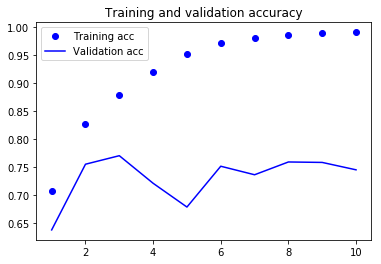

In [69]:
dnn = model()

In [77]:
def model():
    model = Sequential()
    model.add(Embedding(MAX_WORDS, DIMENSION, weights = [embedding_matrix], input_length = MAX_LEN, trainable = False))
    model.add(GRU(256, dropout = 0.1, recurrent_dropout = 0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.summary()
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
    history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_data = (X_test, Y_test))
    plot.plot(history)
    return model

In [78]:
model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 100, 300)          3000000   
_________________________________________________________________
gru_3 (GRU)                  (None, 256)               427776    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 257       
Total params: 3,428,033
Trainable params: 428,033
Non-trainable params: 3,000,000
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 54s 2ms/step - loss: 0.4601 - acc: 0.7774 - val_loss: 0.3738 - val_acc: 0.8344
Epoch 2/10
22500/22500 [==============================] - 54s 2ms/step - loss: 0.3396 - acc: 0.8509 - val_loss: 0.3557 - val_acc: 0.8420
Epoch 3/10
22500/22500 [==============================] - 54s 2ms/s

KeyboardInterrupt: 